# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="Tennis_Windows_x86_64/Tennis.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [5]:
def play_game(random_actions=True):
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    
    loops = 1
    if random_actions:
        loops = 6
    
    for _ in range(loops):
        while True:
            if random_actions:
                actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
                actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
            else:
                actions = agent.act(states, add_noise=False)       # no noise when playing demo game ;)
            env_info = env.step(actions)[brain_name]               # send all actions to tne environment
            next_states = env_info.vector_observations             # get next state (for each agent)
            rewards = env_info.rewards                             # get reward (for each agent)
            dones = env_info.local_done                            # see if episode finished
            scores += env_info.rewards                             # update the score (for each agent)
            states = next_states                                   # roll over states to next time step

            print('\rReal time score (averaged over {} agents) for this episode: {}'.
                  format(num_agents, np.mean(scores)), end="")

            if np.any(dones):                                      # exit loop if episode finished
                break

        print('\rFinal Tennis Score (averaged over {} agents) for this episode: {}'.
                  format(num_agents, np.mean(scores)), end="")

#### Play a random game
Lets play a random game by selecting random actions for each state and see how it goes. Keep in mind that the score should be normally zero, or slightly positive if by "accident" the agents touche the ball using random actions.

In [6]:
play_game(random_actions=True)

Final Tennis Score (averaged over 2 agents) for this episode: -0.029999999329447746

### 4. Time to put some intelligence in action

Now it's time to train our agent to solve the environment!  When training the environment, we set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

We will be importing the model found at `model.py` and the agent found at `ddpg_agent.py` files.

In [7]:
from ddpg_agent import Agent
from collections import namedtuple, deque
import torch

print("state_size",state_size)
print("action_size",action_size)

agent = Agent(state_size=state_size, action_size=action_size, random_seed=19)

state_size 24
action_size 2


#### Play a game on untrained network

We have an intelligent architecture, but despite the sophistication of the architecture, the neural networks weights are just random. Such a setup, but with random weights should give similar results to the "random actions".  Sad, but true.

Lets play a game, but this time using our neural network that (for now) has untrained weights. So let's now watch an untrained agent.

In [8]:
play_game(random_actions=False)

Final Tennis Score (averaged over 2 agents) for this episode: -0.004999999888241291

### Training the Agent 

**We will use a  Deep Deterministic Policy Gradients (DDPG) algorithm**

We will be working with full episode trajectories.

At each episode we will be executing agent actions by calling `agent.act` and wee will be saving SARS results to the memory. 

We will be returning two lists containing scores.
* `avg_episode_scores` will return the average actors score for each distinct episode
* `avg_100deque_scores` will return the average actors score over the last 100 episodes

The method will terminate after 4500 episodes, or when the `avg_100deque_scores` accumulates score of 0.5 or more for the last 100 episodes.

If the method terminates by accumulating score of 0.5 or more at the `avg_100deque_scores` we will be saving a file containing the weights checkpoint for the `actor` and the `critic` neural networks.

In [9]:
NUM_UPDATES   = 1 # update the network 10 times
UPDATE_EVERY  = 1 # after every 20 timesteps 
DESIRED_SCORE = 0.5

def ddpg(n_episodes=4500, print_every=100, average_per_x_episodes=100):
    print('Approach using {} agents: '.format(num_agents))
    
    scores_deque = deque(maxlen=average_per_x_episodes)      # populated by 100 episodes (for mean of 100 episodes)
    avg_episode_scores = [] 
    avg_100deque_scores = []
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]    # reset the environment
        
        scores = np.zeros(num_agents)       
        states = env_info.vector_observations                # get the current state (for each agent)
        count = 0     
              
        while True:
            count += 1
            agent.reset()
            actions = agent.act(states, add_noise=True)
            env_info = env.step(actions)[brain_name]         # send all actions to the environment
            next_states = env_info.vector_observations       # get next state (for each agent)
            rewards = env_info.rewards                       # get reward (for each agent)
            dones = env_info.local_done                      # see if episode finished

            #agent.step(states, actions, rewards, next_states, dones)
           
            
            # Store the SARS to the memory
            for i in range(0, num_agents):
                agent.add_sars_to_memory(states[i], actions[i], rewards[i], next_states[i], dones[i])

            # After 20 steps, make 10 updates
            agent.learn_by_memory(current_step=count, update_every_x_steps=UPDATE_EVERY, num_of_updates=NUM_UPDATES)
            
             
            scores += rewards
            states = next_states
            if np.any(dones):
                break

        score = np.max(scores)             # the score of the episode will be the max agent's scores
        scores_deque.append(score)         # add the score to the 100 episodes deque
        
        avg_episode_scores.append(score)    # add the score to the total episodes deque
        avg_100deque_scores.append(np.mean(scores_deque))

        print('\rEpisode {}\tAverage Score: {:.3f}\tMax Score: {:.3f}'.format(i_episode, np.mean(scores_deque), np.max(scores_deque)), end="")
        if i_episode % print_every == 0:
            print('\rEpisode {}\tAverage Score: {:.3f}\tMax Score: {:.3f}'.format(i_episode, np.mean(scores_deque), np.max(scores_deque)))
        if np.mean(scores_deque) >= DESIRED_SCORE:
            print('\n Environment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_deque)))
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor_agents.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic_agent.pth')
            break   
    return avg_episode_scores, avg_100deque_scores

In [10]:
avg_episode_scores, avg_100deque_scores = ddpg()

Approach using 2 agents: 
Episode 100	Average Score: 0.025	Max Score: 0.300
Episode 200	Average Score: 0.110	Max Score: 1.100
Episode 300	Average Score: 0.416	Max Score: 2.600
Episode 314	Average Score: 0.514	Max Score: 2.600
 Environment solved in 214 episodes!	Average Score: 0.51


#### Plot the scores

The bellow function takes a list and plots it

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_list(list):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(1, len(list)+1), list)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.show()

#### List: Print the mean score per 100 episodes

Print the deque results of the mean based on the last 100 episodes all the way from the first episode to the last, and then plot these results

In [12]:
print(avg_100deque_scores)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0036000000685453416, 0.003461538527447444, 0.003333333396801242, 0.0067857144001339164, 0.00655172424840516, 0.00966666682312886, 0.009354838861092445, 0.009062500146683306, 0.008787878930117145, 0.008529411902760757, 0.008285714419824737, 0.008055555685940716, 0.010540540707675187, 0.010263158057473208, 0.012564102760874309, 0.017250000266358256, 0.01682926855254464, 0.016428571682245957, 0.0160465118756821, 0.01568181842396205, 0.017555555825432143, 0.017173913307487965, 0.01680851089669035, 0.018541666950720053, 0.020204081941319972, 0.021800000332295896, 0.021372549345388132, 0.02288461573278675, 0.022452830530281336, 0.022037037372313165, 0.021636363965543835, 0.02125000032330198, 0.020877193300086156, 0.020517241691463982, 0.020169491832286626, 0.019833333635081846, 0.019508197018113294, 0.019193548679111466, 0.018888889176268426, 0.018593750282889232, 0.0183

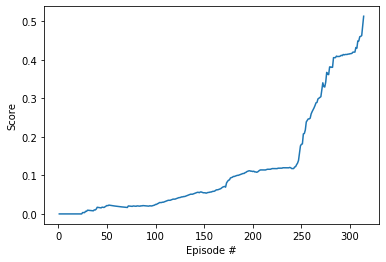

In [13]:
plot_list(avg_100deque_scores)

#### List: Print the mean score per episodes

Print the list with the results of the mean agents score per episode, all the way from the first episode to the last, and then plot these results

In [14]:
print(avg_episode_scores)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.09000000171363354, 0.0, 0.0, 0.10000000149011612, 0.0, 0.10000000149011612, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.10000000149011612, 0.0, 0.10000000149011612, 0.20000000298023224, 0.0, 0.0, 0.0, 0.0, 0.10000000149011612, 0.0, 0.0, 0.10000000149011612, 0.10000000149011612, 0.10000000149011612, 0.0, 0.10000000149011612, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.30000000447034836, 0.0, 0.0, 0.0, 0.0, 0.10000000149011612, 0.0, 0.0, 0.0, 0.10000000149011612, 0.0, 0.0, 0.0, 0.10000000149011612, 0.0, 0.09000000171363354, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.10000000149011612, 0.0, 0.0, 0.10000000149011612, 0.10000000149011612, 0.09000000171363354, 0.20000000298023224, 0.0, 0.19000000320374966, 0.09000000171363354, 0.20000000298023224, 0.0, 0.0, 0.09000000171363354, 0.0, 0.10000000149011612, 0.10000000149011612, 0.100000001490116

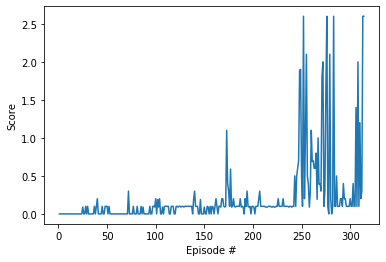

In [15]:
plot_list(avg_episode_scores)

#### Load the weights checkpoints for the neural networks

Incase you want to use the resulted weights based on visualization of the data above, please do run the cell bellow to restore the weights configurations for the actor and critic neural networks.

In [16]:
agent.actor_local.load_state_dict(torch.load('checkpoint_actor_agents.pth'))
agent.critic_local.load_state_dict(torch.load('checkpoint_critic_agent.pth'))

#### Play a game on trained network - Watch a smart agent
We will play again the game using the neural network, but this time based on the trained neural networks. Now, lets watch a "smart agent"!

In [17]:
play_game(random_actions=False)

Final Tennis Score (averaged over 2 agents) for this episode: 2.600000038743019

#### Terminate the Unity environment

Call the `env.close` to terminate the unity environment

In [18]:
env.close()